# Aprendizagem Automática Avançada
## Assigment 4
### Luís Ferreirinha Nº51127
### Christopher Anaya Nª60566

## Problem 2

In [14]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
from math import exp

### a) construct the model assuming all parameters known

In [2]:
rolls = np.array([[int(x) - 1] for x in "664153216162115234653214356634261655234232315142464156663246"])
# states: 1 - loaded, 0 - fair
dice = np.array([[1 if x == "L" else 0] for x in "LLLLLLLLLLLLLLFFFFFFLLLLLLLLLLLLLLFFFFFFFFFFFFFFFFFFLLLLLLLL"])
rolls

array([[5],
       [5],
       [3],
       [0],
       [4],
       [2],
       [1],
       [0],
       [5],
       [0],
       [5],
       [1],
       [0],
       [0],
       [4],
       [1],
       [2],
       [3],
       [5],
       [4],
       [2],
       [1],
       [0],
       [3],
       [2],
       [4],
       [5],
       [5],
       [2],
       [3],
       [1],
       [5],
       [0],
       [5],
       [4],
       [4],
       [1],
       [2],
       [3],
       [1],
       [2],
       [1],
       [2],
       [0],
       [4],
       [0],
       [3],
       [1],
       [3],
       [5],
       [3],
       [0],
       [4],
       [5],
       [5],
       [5],
       [2],
       [1],
       [3],
       [5]])

In [15]:
casino_model = hmm.CategoricalHMM(n_components=2)
casino_model.n_features = 6
casino_model.startprob_ = np.array([(0.1 / (0.05+0.1)),(0.05/(0.05+0.1))])
casino_model.transmat_ = np.array([[0.95, 0.05],
                                   [0.1, 0.90]])
casino_model.emissionprob_ = np.array([[(1/6),(1/6),(1/6),(1/6),(1/6),(1/6)],
                                       [(1/10),(1/10),(1/10),(1/10),(1/10),(5/10)]])
print(casino_model.score(rolls[-10:]))
print(exp(casino_model.score(rolls[-10:])))

-16.98461390418157
4.204127747863525e-08


### b)

In [21]:
Xtrain = rolls[:-10]
Xvalidate = rolls[-10:]
runs = 50
best_score = best_model = None
for i in range(runs):
    casino_model_b = hmm.CategoricalHMM(n_components=2, init_params='t',n_iter=1000, tol=0.001)
    casino_model_b.n_features = 6
    casino_model_b.startprob_ = np.array([(0.1 / (0.05+0.1)),(0.05/(0.05+0.1))])
    casino_model_b.emissionprob_ = np.array([[(1/6),(1/6),(1/6),(1/6),(1/6),(1/6)],
                                       [(1/10),(1/10),(1/10),(1/10),(1/10),(5/10)]])
    casino_model_b.fit(Xtrain)
    score = casino_model_b.score(Xvalidate)
    if best_score is None or score > best_score:
        best_score = score
        best_model = casino_model_b

In [22]:
print(best_model.transmat_)
print(best_score)
print(exp(best_score))

[[3.21072781e-05 9.99967893e-01]
 [8.92242498e-01 1.07757502e-01]]
-16.16755818368941
9.51740816597555e-08


/var/folders/8n/fvy2xsw12llfyf8xy2nmq6tm0000gn/T/ipykernel_76693/318103204.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


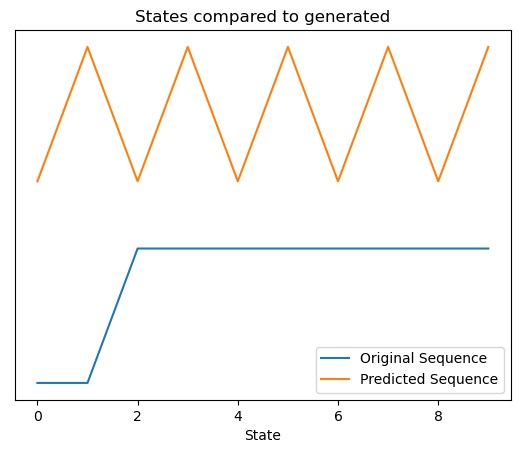

In [6]:
states = best_model.predict(rolls[-10:])

fig, ax = plt.subplots()
ax.plot(dice[-10:], label='Original Sequence')
ax.plot(states + 1.5, label='Predicted Sequence')
ax.set_yticks([])
ax.set_title('States compared to generated')
ax.set_xlabel('Time (# rolls)')
ax.set_xlabel('State')
ax.legend()
fig.show()

### c)

In [43]:
with open("rolls.txt",'r') as infile:
    dataset = infile.readlines()
    X = [[int(i)-1] for i in dataset]

with open("dice.txt","r") as infile:
    dataset = infile.readlines()
    Y = []
    for i in dataset:
        if i[0] == 'L':
            Y.append(1)
        else:
            Y.append(0)

XTrain = X[int(-len(X)/2):]
XValidate = X[:int(-len(X)/2)]

In [38]:
casino_model_c_i = hmm.CategoricalHMM(n_components=2, init_params='te',n_iter=1000, tol=0.001)
casino_model_c_i.n_features = 6
casino_model_c_i.startprob_ = np.array([(0.1 / (0.05+0.1)),(0.05/(0.05+0.1))])
casino_model_c_i.fit(XTrain)
score = casino_model_c_i.score(XValidate)
print('Score: ' + str(casino_model_c_i.score(XValidate)) + '\n')
print('Transition Matrix: \n' + str(casino_model_c_i.transmat_) + '\n')
print('Emission Matrix: \n' + str(casino_model_c_i.emissionprob_) + '\n')

Score: -956.3206352615961

Transition Matrix: 
[[0.16078947 0.83921053]
 [0.32047965 0.67952035]]

Emission Matrix: 
[[0.357706   0.14317595 0.00315588 0.00194827 0.45519898 0.03881491]
 [0.06899926 0.12619959 0.22776436 0.20558201 0.01395615 0.35749863]]



In [39]:
for state in range(1,5):
    model = hmm.CategoricalHMM(n_components=state, n_iter=1000, tol=0.001)
    model.n_features = 6
    model.fit(XTrain)
    score = model.score(XValidate)
    print('For the HMM with %d state(s):\n'%state)
    print('Score: ' + str(model.score(XValidate)) + '\n')
    print('Transition matrix:\n' + str(model.transmat_) + '\n')
    print('Emission matrix:\n' + str(model.emissionprob_) + '\n')
    print('Starting probabilities matrix:\n' + str(model.startprob_) + '\n')

For the HMM with 1 state(s):

Score: -954.6136116308819

Transition matrix:
[[1.]]

Emission matrix:
[[0.14909091 0.13090909 0.16545455 0.14909091 0.13636364 0.26909091]]

Starting probabilities matrix:
[1.]

For the HMM with 2 state(s):

Score: -953.4481779922975

Transition matrix:
[[0.94092877 0.05907123]
 [0.23040441 0.76959559]]

Emission matrix:
[[1.54683460e-01 1.47062008e-01 2.07617490e-01 1.79096093e-01
  1.37676615e-01 1.73864333e-01]
 [1.27215985e-01 6.77279382e-02 5.36755676e-04 3.17274597e-02
  1.31228000e-01 6.41563861e-01]]

Starting probabilities matrix:
[1.00000000e+00 3.10684742e-44]

For the HMM with 3 state(s):

Score: -952.520647886941

Transition matrix:
[[5.12725304e-01 4.55871192e-01 3.14035039e-02]
 [6.36223572e-01 2.58773415e-01 1.05003013e-01]
 [4.57351812e-04 2.61178180e-01 7.38364468e-01]]

Emission matrix:
[[2.40544013e-01 2.44612434e-01 2.82673193e-01 6.89748676e-06
  2.29887988e-01 2.27547477e-03]
 [3.86185146e-02 1.59219660e-06 1.03961042e-01 4.27371494

/var/folders/8n/fvy2xsw12llfyf8xy2nmq6tm0000gn/T/ipykernel_76693/649036025.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


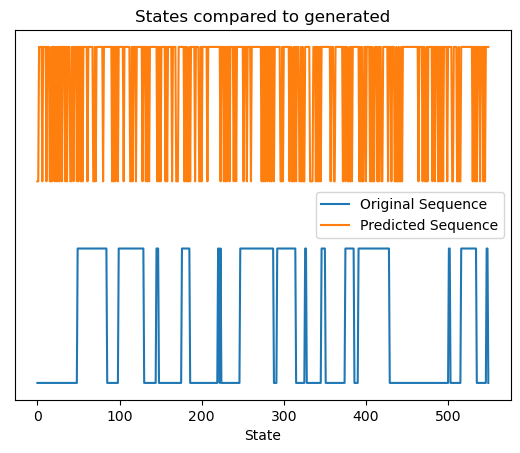

In [44]:
states = casino_model_c_i.predict(XValidate)

fig, ax = plt.subplots()
ax.plot(Y[:int(-len(X)/2)], label='Original Sequence')
ax.plot(states + 1.5, label='Predicted Sequence')
ax.set_yticks([])
ax.set_title('States compared to generated')
ax.set_xlabel('Time (# rolls)')
ax.set_xlabel('State')
ax.legend()
fig.show()

In [65]:
_, samples = casino_model.sample(n_samples=30000)
samples = samples.reshape(-1,1)
X_train = samples[int(-len(samples)/2):]
X_test = samples[:int(-len(samples)/2)]

In [66]:
casino_model_d_i = hmm.CategoricalHMM(n_components=2, init_params='te',n_iter=1000, tol=0.001)
casino_model_d_i.n_features = 6
casino_model_d_i.startprob_ = np.array([(0.1 / (0.05+0.1)),(0.05/(0.05+0.1))])
casino_model_d_i.fit(X_train)
score = casino_model_d_i.score(X_test)
print('Score: ' + str(casino_model_d_i.score(X_test)) + '\n')
print('Transition Matrix: \n' + str(casino_model_d_i.transmat_) + '\n')
print('Emission Matrix: \n' + str(casino_model_d_i.emissionprob_) + '\n')

Score: -3596.14333976206

Transition Matrix: 
[[0.95375649 0.04624351]
 [0.1026956  0.8973044 ]]

Emission Matrix: 
[[9.99569794e-01 4.30205900e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.36330024e-04 9.99263670e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]



In [67]:
for state in range(1,5):
    model = hmm.CategoricalHMM(n_components=state, n_iter=1000, tol=0.001)
    model.n_features = 6
    model.fit(X_train)
    score = model.score(X_test)
    print('For the HMM with %d state(s):\n'%state)
    print('Score: ' + str(model.score(X_test)) + '\n')
    print('Transition matrix:\n' + str(model.transmat_) + '\n')
    print('Emission matrix:\n' + str(model.emissionprob_) + '\n')
    print('Starting probabilities matrix:\n' + str(model.startprob_) + '\n')

For the HMM with 1 state(s):

Score: -9386.223321417925

Transition matrix:
[[1.]]

Emission matrix:
[[0.68946667 0.31053333 0.         0.         0.         0.        ]]

Starting probabilities matrix:
[1.]

For the HMM with 2 state(s):

Score: -3596.4860737738254

Transition matrix:
[[0.95358493 0.04641507]
 [0.10300933 0.89699067]]

Emission matrix:
[[9.99759824e-01 2.40176308e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.63971396e-04 9.99236029e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]

Starting probabilities matrix:
[1.00000000e+000 1.12231925e-115]

For the HMM with 3 state(s):

Score: -3594.32173944352

Transition matrix:
[[9.56243178e-01 3.60316611e-02 7.72516122e-03]
 [2.95773337e-04 3.68879699e-03 9.96015430e-01]
 [1.01393152e-01 8.52353650e-07 8.98605995e-01]]

Emission matrix:
[[0.99695691 0.00304309 0.         0.         0.         0.        ]
 [0.38306126 0.61693874 0.         0.         0.         0.        ]
 [0.0023701